# Gradient Descent

## Contents

* Introduction
* Algorithms
* Gradient Descent for Linear Regression
* Application on Dataset
   * Data Visualization
   * Modeling and Test Model
* Error Analysis

## Introduction

Gradient Descent Optimization is the most commonly used optimization algorithm for neural network model training. For deep learning models, the gradient descent algorithm is basically used for optimization training.

The principle behind the gradient descent algorithm: the gradient of the objective function $J(\theta)$ with respect to the parameters $\theta$ will be the direction in which the loss function rises fastest. And if we want to minimize the loss, we only need to advance the parameters one step in the opposite direction of the gradient to achieve the decline of the objective function (loss function). This step size is also called the learning rate. The parameter update formula is as follows:

$\theta $ <- $\theta - \eta\nabla J(\theta)$

The gradient descent algorithm can be divided into Batch Gradient Descent, Stochastic Gradient Descent, and Mini-batch Gradient Descent depending on the amount of data used to compute the objective function, where  $J(\theta)$  is the gradient of the parameter. Gradient Descent). 

For the Batch Gradient Descent algorithm, the $J(\theta)$  is computed on the whole training set, which may face the problem of insufficient memory if the dataset is relatively large, and its convergence speed is generally slow. 

Stochastic gradient descent algorithm is the other extreme that 
 $J(\theta)$ is computed for a training sample in the training set, also known as online learning, i.e., once a sample is obtained, a parameter update can be executed. Therefore, its convergence speed is faster, but there is a possibility of oscillation of the objective function value, because the high frequency of parameter updates leads to high variance. 
 
 
 The small-batch gradient descent algorithm is a compromise solution, which selects a small batch of samples (usually a multiple of 2, such as 32, 64,128, etc.) in the training set to ensure a more stable training process, and the use of batch training methods can also take advantage of the matrix calculation. This is currently the most commonly used gradient descent algorithm.

## Algorithms

### Exponentially weighted moving averages

Before talking about various improved gradient descent algorithms, we briefly introduce exponentially weighted moving averages, because many of the algorithms we talk about later have to use this concept. Its target sequence data, such as 
 the observed value at time $t$ is $x(t)$, then evaluate the 
 the moving average at the moment of time as
 
 $v(t)$ <- $\beta v(t-1)$+$(1-\beta)x(t)$

### Momentum optimization

The impulse gradient descent algorithm was proposed by Boris Polyak in 1964 and is based on the physical fact that a small ball is rolled down from the top of a hill with a slow initial rate, but the rate increases quickly under acceleration and eventually reaches a stable rate due to the presence of drag. For the impulse gradient descent algorithm, the update equation is as follows:

$m $ <- $\gamma m + \eta\nabla J(\theta)$

$\theta $ <- $\theta - m$

It can be seen that the parameter update not only considers the current gradient value, but also adds an accumulation term (impulse), but with an additional superparameter 
 Compared to the original gradient descent algorithm, the impulse gradient descent algorithm helps to accelerate the convergence. The impulse term increases when the gradient is in the same direction as the impulse, and decreases when it is in the opposite direction, so the impulse gradient descent algorithm can reduce the training oscillation process.

Sometimes, the impulse gradient descent algorithm can also be implemented in the following way:

$m $ <- $\beta m + (1-\beta)\nabla J(\theta)$

$\theta $ <- $\theta - \eta m$


### Nesterov Accelerated Gradient (NAG)

The NAG algorithm is an improved version of the impulse gradient descent algorithm proposed by Yurii Nesterov in 1983, which is much faster. The change is in the calculation of the "over-gradient" to update the impulse term, which is formulated as follows:

$m $ <- $\gamma m + \eta\nabla J(\theta-\gamma m)$

$\theta $ <- $\theta - m$

<img src="./Desktop/semester2/577_github/NAG.png" width="300" height="300">

### AdaGrad

AdaGrad is a gradient descent algorithm with adaptive learning rate proposed by Duchi in 2011. In the training iteration process, its learning rate is gradually decaying, and the learning rate decays faster for parameters that are updated frequently, which is an adaptive algorithm. Its update process is as follows:

<img src="./Desktop/semester2/577_github/as.png" width="200" height="200">

<img src="./Desktop/semester2/577_github/ada.png" width="500" height="500">

### RMSprop

RMSprop is taught by Hinton in his course, its kind of improvement to Adagrad algorithm, mainly to solve the problem of learning rate decaying too fast. The idea is actually very simple, similar to Momentum idea, introducing a hyperparameter that decays in accumulating gradient squared terms:

<img src="./Desktop/semester2/577_github/RMS.png" width="300" height="300">

### Adaptive moment estimation (Adam)

Adam is a new optimization algorithm proposed by Kingma et al. in 2015, which combines the ideas of Momentum and RMSprop algorithms. Compared to the Momentum algorithm, its learning rate is adaptive, while compared to RMSprop, it adds an impulse term. Therefore, Adam is a combination of both:

<img src="./Desktop/semester2/577_github/Ada2.png" width="300" height="300">

### Learning Rate

The problem of learning rate was also mentioned earlier. For gradient descent algorithms, this should be one of the most important hyperparameters. If the learning rate is set very large, then the training may not converge and just diverge; if it is set relatively small, it may converge but the training time may be unacceptable; if it is set slightly higher, the training speed will be fast, but when the optimal point is approached it will oscillate and even unstable. The impact of the choice of different learning rates may be very large, as shown in the figure:
<img src="./Desktop/semester2/577_github/lr.png" width="500" height="500">

## Gradient Descent for Linear Regression

We can define the resdiual sum of squares:


<img src="./Desktop/semester2/577_github/R.png" width="300" height="300">

To find $\beta$ to minimize the loss function, we can use gradient descent algorithm. 

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Function

In [94]:
class GradientDescentLR():
    def __init__(self) -> None:
        self.X = None
        self.y = None
        self.theta = None
        self.max_iter = None
        self.learning_rate = None
        self.weights = None
        self.weights_history = []
        self.MSE_history = [np.inf]

    def MSE(self):
        MSE = 0.5 * (self.y - self.X @ self.weights).T@(self.y - self.X @ self.weights)
        return MSE
    
    def fit(self, X, y, learning_rate=0.01,eta=0.001,max_iter=100):
        X = X.to_numpy()
        y = y.to_numpy()
        ones_column = np.ones((X.shape[0], 1))
        X = np.append(ones_column, X, axis=1)
        self.X = X
        self.y = y
        self.eta = eta
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        weights = np.random.rand(X.shape[1])
        self.weights = weights
        self.weights_history.append(weights)
        for i in range(1, max_iter+1):
            grad = - self.X.T @ (self.y - self.X@self.weights)
            weights = weights - learning_rate * grad
            self.weights = weights
            self.weights_history.append(weights)
            my_MSE = self.MSE()
            self.MSE_history.append(my_MSE)
            if abs(my_MSE - self.MSE_history[i-1]) <= self.eta or i >= self.max_iter:
                break

    def predict(self, X, weights):
        X = X.to_numpy()
        ones_column = np.ones((X.shape[0], 1))
        X = np.append(ones_column, X, axis=1)
        return X @ weights


In [164]:
X = np.array([1,2,5,7,10])
y = np.array([2,6,9,15,17])

In [165]:
type(X)

numpy.ndarray

In [166]:
X = pd.DataFrame(X)
y = pd.Series(y)
model = GradientDescentLR()
model.fit(X, y)

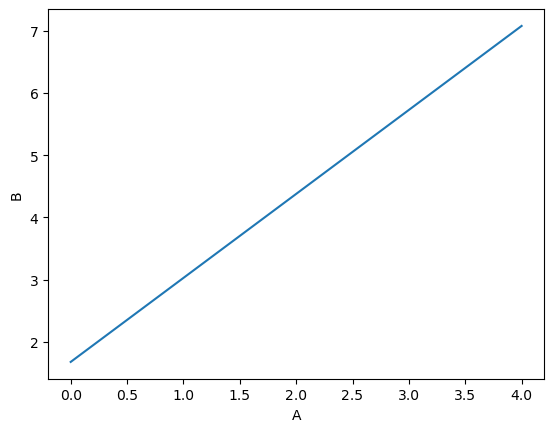

In [167]:
# Generate data
A = np.arange(0, 5)
B = model.weights[0]*A + model.weights[1]

# Plot the line graph
plt.plot(A, B)

# Set the x and y axis labels
plt.xlabel('A')
plt.ylabel('B')

# Show the plot
plt.show()

MSE at iter 10 = 8.326651937249325
MSE at iter 50 = 4.135229668321523
MSE at iter 100 = 4.09923580912511
MSE at iter 1000 = 4.089669615308762


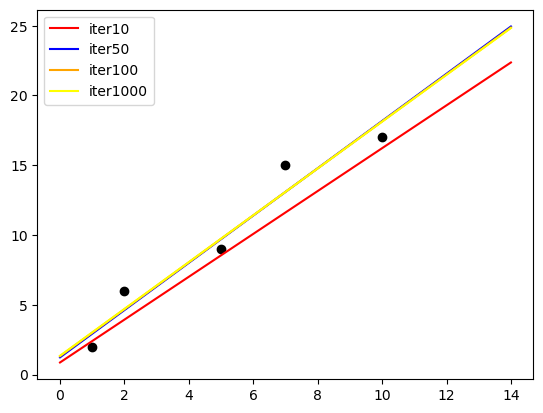

In [168]:
plt.scatter(X, y, c='k')
colors = {10:'red', 50:'blue', 100:'orange' , 1000:'yellow'}
A = np.arange(0, 15)
for i in [10, 50, 100, 1000]:
    model = GradientDescentLR()
    model.fit(X, y,max_iter=i)
    B = model.weights[1]*A + model.weights[0]
    print(f'MSE at iter {i} = {model.MSE()}')
    plt.plot(A, B, label = f'iter{i}', color = colors[i])
plt.legend()
plt.show()

We can set iter = 100, because after 100, there is little change in the MSE.

In [178]:
A = np.arange(0, 15)
for i in [0.001, 0.005, 0.008, 0.01]:
    model = GradientDescentLR()
    model.fit(X, y,learning_rate=i, max_iter=100)
    B = model.weights[1]*A+model.weights[0]
    print(f'MSE at learning rate {i} = {model.MSE()}')


MSE at learning rate 0.001 = 4.393782539137645
MSE at learning rate 0.005 = 4.130443394874417
MSE at learning rate 0.008 = 4.138854139177765
MSE at learning rate 0.01 = 4.089698366795558


Maybe 0.01 is a good learing rate.

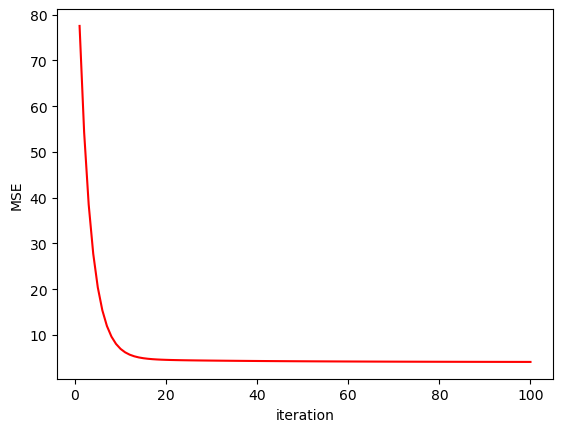

In [177]:
model = GradientDescentLR()
model.fit(X, y,max_iter=100,learning_rate=0.01)
plt.plot(range(1, len(model.MSE_history)), model.MSE_history[1:len(model.MSE_history)], c='r')
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.show()

We can see that the MSE is become smaller and smaller when the number of iterations become larger. When the number of iterations reaches a certain number, the MSE drops sharply to be close to 0.

## Application on Dataset

In [147]:
import numpy as np 
import pandas as pd 
from IPython.display import Image 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [148]:
data = pd.read_csv('/Users/liusiling/Desktop/semester2/577_github/Salary_dataset.csv')

In [149]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [180]:
data.shape

(30, 2)

In [151]:
# Split features X and y
data = data[['Salary','YearsExperience']]
data = data.dropna(axis=0)
X = data['YearsExperience']
y=data['Salary']/10000

In [152]:
X = pd.DataFrame(X.values)
y = pd.Series(y.values)

In [122]:
lr = GradientDescentLR()

lr.fit(X, y,learning_rate=0.001)

In [154]:
lr.weights

array([1.71239861, 1.05836234])

MSE at iter 10 = 28.3185968959083
MSE at iter 50 = 16.896959428862885
MSE at iter 100 = 14.81501024620499
MSE at iter 200 = 9.735156430487518


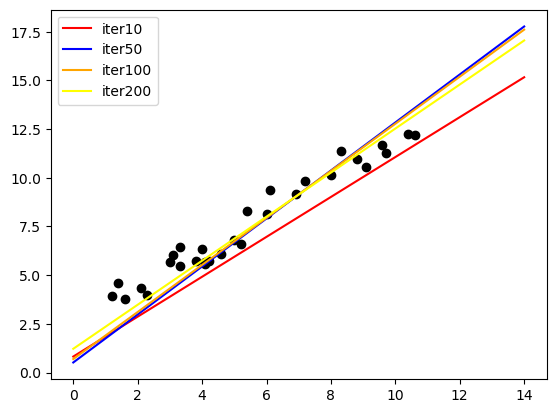

In [160]:
plt.scatter(X, y, c='k')
colors = {10:'red', 50:'blue', 100:'orange' , 200:'yellow'}
A = np.arange(0, 15)
for i in [10, 50, 100, 200]:
    model = GradientDescentLR()
    model.fit(X, y,max_iter=i,learning_rate = 0.0001)
    B = model.weights[1]*A + model.weights[0]
    print(f'MSE at iter {i} = {model.MSE()}')
    plt.plot(A, B, label = f'iter{i}', color = colors[i])
plt.legend()
plt.show()

From this plot, we can know that there is no big difference of MSE when the number of iterations become larger than 50. The reason might be that our data has a small number of samples.

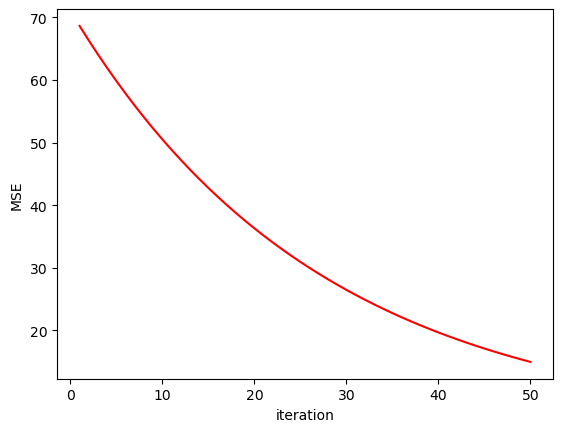

In [181]:
model = GradientDescentLR()
model.fit(X, y,max_iter=50,learning_rate=0.0001)
plt.plot(range(1, len(model.MSE_history)), model.MSE_history[1:len(model.MSE_history)], c='r')
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.show()

The MSE is also negatively relative with the number of iterations.